## Project Programming for Data Analytics 2018

http://hea.ie/assets/uploads/2018/02/HEA-Key-Facts-And-Figures-2016-17-FINAL.pdf


# Dataset Simulation

## Student ID G00219132
    
This notebook is a submission for Project 2018 for the Module **Programming for Data Analytics** The module is delivered as part of the [Higher Diploma in Data Analytics](https://www.gmit.ie/computing/higher-diploma-science-computing-data-analytics-ict-skills) in [Galway Mayo IT](https://www.gmit.ie/), Galway.

### problem statement outline
Below is an extract from the project instructions.

**Problem statement**

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. 

Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – thedata set itself can simply be displayed in an output cell within the notebook.

*Note students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set.*

### notebook structure
The notebook is split up into the following sections

* Section One - General setup and importatation of necessary python libraries/packages
* Section Two - Details of chosen phenomenon 
* Section Three - the types of variables involved, their likely distributions, and their relationships with each other.
* Section Four - Synthesise/simulate a data set as closely matching their properties as possible.
* Section Five - ????????????????????/
* Section Six - references and conclusion

### Section one - general set up
programming language - Python 3.7.0.for some information about Python and it's uses see the wikipedia page, [Python](https://en.wikipedia.org/wiki/Python_(programming_language))

python packages imported

* Mathplotlib.pyplot.py [Mathplotlib.org](https://matplotlib.org)
* NumPy [NumPy](http://www.numpy.org/)
* Seaborn [Seaborn](https://seaborn.pydata.org)
* Pandas [Pandas](https://pandas.pydata.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

### Section Two - Details of chosen phenomenon 

http://hea.ie/assets/uploads/2018/02/HEA-Key-Facts-And-Figures-2016-17-FINAL.pdf


### Section Three - the types of variables involved, their likely distributions, and their relationships with each other.

In [5]:
import numpy as np

building a student dataset to look at vaiables that might influence progression as reported by HEA[1]

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt 

In [8]:
import pandas as pd

 ### Section Four - Synthesise/simulate a data set as closely matching their properties as possible.

In [9]:
M_F =np.random.choice (['male', 'female'], 100, p =[0.49,0.51])
M_F

array(['female', 'female', 'female', 'female', 'male', 'female', 'female',
       'female', 'male', 'female', 'female', 'female', 'male', 'male',
       'male', 'male', 'female', 'female', 'male', 'female', 'male',
       'female', 'male', 'female', 'female', 'male', 'female', 'female',
       'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'female', 'female', 'female', 'male', 'female', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'female',
       'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'female', 'female', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'female', 'female', 'female', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'female'

In [10]:
full_part = np.random.choice (['full time', 'part time','remote'], 100, p =[0.8,0.17,0.03])
full_part

array(['remote', 'part time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'part time', 'part time', 'part time',
       'full time', 'full time', 'full time', 'remote', 'full time',
       'part time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'part time', 'full time', 'part time', 'part time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'part time', 'full time', 'remote', 'full time', 'full time',
       'remote', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'part time',
       'part time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'full time', 'full time',
       'full time', 'full time', 'full time', 'part time', 'part time',
       'full time', 'full time', 'part time', 'full time', 'full time',
    

In [11]:

pref =[]
for i in range (1,101):
   # pref = (print(int(13**np.random.random())))
    p = (int(10**np.random.random()))
    pref.append(p)
    ## assume preference follows benfords law
print (pref)
print(i)


[3, 3, 1, 7, 1, 3, 8, 2, 3, 6, 6, 9, 3, 5, 1, 1, 1, 3, 1, 1, 2, 3, 1, 4, 3, 1, 3, 1, 1, 1, 9, 3, 7, 2, 1, 2, 1, 3, 5, 7, 7, 6, 2, 6, 1, 1, 4, 3, 5, 1, 8, 1, 5, 1, 7, 3, 1, 1, 2, 5, 5, 1, 7, 3, 2, 2, 1, 2, 2, 6, 1, 1, 4, 6, 5, 2, 1, 5, 1, 5, 1, 4, 2, 6, 2, 2, 1, 2, 9, 1, 3, 1, 8, 4, 1, 2, 3, 5, 5, 7]
100


In [12]:
cao = np.random.randint(32, 70, size=100)
cao=cao*5
print(cao)
# cao pts in stps of 5 in range 160-350

[225 170 225 345 295 180 345 280 270 300 320 250 180 265 240 345 180 255
 325 255 165 340 300 315 330 310 290 295 225 170 265 315 310 265 270 240
 270 230 280 235 185 170 240 310 160 210 305 340 195 225 320 180 250 340
 295 180 205 240 170 190 325 345 200 180 275 170 290 305 320 245 295 340
 215 230 230 180 215 340 290 235 200 180 265 300 290 170 335 320 230 280
 260 175 160 315 195 295 275 280 180 305]


In [13]:
# below creates an array of random dates based on published student breakdowns SEP 2016
DOB =[]
def random_date(start_date, range_in_days):
    days_to_add = np.arange(0, range_in_days)
    random_date = np.datetime64(start_date) + np.random.choice(days_to_add)
    return random_date
i=1
for i in range(4):
    dob17 = random_date('1999-01-01', 635)
    DOB.append(dob17)
for i in range(34):
    dob18 = random_date('1998-01-01', 200)
    DOB.append(dob18)    
for i in range(38): ##changed to 38 to allow for rounding in published %
    dob19 = random_date('1997-01-01', 200)
    DOB.append(dob19)
for i in range(9):
    dob20 = random_date('1996-01-01', 200)
    DOB.append(dob20)
for i in range(3):
    dob21 = random_date('1995-01-01', 200)
    DOB.append(dob21)   
for i in range(1):
    dob22 = random_date('1994-01-01', 200)
    DOB.append(dob22)
for i in range(1):
    dob23 = random_date('1993-01-01', 200)
    DOB.append(dob23)
for i in range(2):
    dob24 = random_date('1992-01-01', 200)
    DOB.append(dob24)
for i in range(3):
    dob25_29 = random_date('1987-01-01', 1460)
    DOB.append(dob25_29)
    print (dob25_29)
for i in range(5):
    dob30up = random_date('1941-01-01', 16425)
    DOB.append(dob30up)
    print (dob30up)
    
print (DOB)
#adapted from response to stackoverflow query[3]

1987-02-22
1990-07-30
1990-12-20
1946-04-21
1976-11-19
1947-07-27
1957-03-03
1984-06-08
[numpy.datetime64('1999-12-29'), numpy.datetime64('1999-03-16'), numpy.datetime64('2000-08-17'), numpy.datetime64('1999-07-02'), numpy.datetime64('1998-01-30'), numpy.datetime64('1998-04-24'), numpy.datetime64('1998-04-04'), numpy.datetime64('1998-05-31'), numpy.datetime64('1998-05-18'), numpy.datetime64('1998-01-01'), numpy.datetime64('1998-05-18'), numpy.datetime64('1998-07-10'), numpy.datetime64('1998-06-24'), numpy.datetime64('1998-05-31'), numpy.datetime64('1998-02-12'), numpy.datetime64('1998-05-27'), numpy.datetime64('1998-04-18'), numpy.datetime64('1998-06-13'), numpy.datetime64('1998-07-02'), numpy.datetime64('1998-05-09'), numpy.datetime64('1998-04-05'), numpy.datetime64('1998-05-03'), numpy.datetime64('1998-02-02'), numpy.datetime64('1998-04-26'), numpy.datetime64('1998-05-17'), numpy.datetime64('1998-01-10'), numpy.datetime64('1998-04-28'), numpy.datetime64('1998-02-01'), numpy.datetime6

In [14]:
# below attempts to base cao pts on dob!
## 50/50 to test need to get % breakdowns and pass in##
DOB =[]
cao =[]
def random_date(start_date, range_in_days):
    days_to_add = np.arange(0, range_in_days)
    random_date = np.datetime64(start_date) + np.random.choice(days_to_add)
    return random_date
i=1
for i in range(50):
    dob17 = random_date('1999-01-01', 635)
    DOB.append(dob17)
    cao17 = (np.random.randint(32, 70)*5)
    cao.append(cao17)
  #  print(dob17)
  #  print(cao17)
    
for i in range(50):
    dob18 = random_date('1998-01-01', 200)
    DOB.append(dob18)
    caor = np.random.randint(500, 550)
    cao.append(caor)

In [15]:
df = pd.DataFrame ()
df ["full_part"] = full_part
df ["pref"] = pref
df ["CAO"] = cao
df ["Male_Female"] = M_F
df ["Date of Birth"]=DOB
#df ["list"] = (int(13**np.random.random()))

In [16]:
df

,full_part,pref,CAO,Male_Female,Date of Birth
0,remote,3,285,female,1999-09-13
1,part time,3,310,female,2000-01-13
2,full time,1,255,female,2000-04-07
3,full time,7,180,female,2000-02-23
4,full time,1,195,male,1999-07-23
5,full time,3,210,female,2000-06-09
6,full time,8,270,female,1999-01-13
7,full time,2,195,female,1999-03-06
8,full time,3,300,male,2000-01-14
9,full time,6,170,female,1999-06-07


In [17]:
df.describe()
df.describe(include='all') 
##df.groupby ("full_part").describe(include='all') 
import datetime
import sys
old_stdout = sys.stdout
sys.stdout = open('generalstats.txt', 'w')
print(df.describe())
print('\n'*2)
df.describe(include='all') 
print(df.describe(include='all'))
print ("Run date and time: " ,datetime.datetime.now().strftime("Date: %d-%m-%y    Time: %H-%M"))

sys.stdout = old_stdout
df.describe(include='all') 

# output to a csv adapted from code used for GMIT Programming & Scripting project 2018 [1] and
# trouble shooting assistance from a stackoverflow query responseto someone else's query[2]


,full_part,pref,CAO,Male_Female,Date of Birth
count,100,100.000000,100.000000,100,100
unique,3,NaN,NaN,2,93
top,full time,NaN,NaN,female,1999-03-07 00:00:00
freq,77,NaN,NaN,52,2
first,NaN,NaN,NaN,NaN,1998-01-07 00:00:00
last,NaN,NaN,NaN,NaN,2000-09-26 00:00:00
mean,NaN,3.290000,387.180000,NaN,NaN
std,NaN,2.341091,144.868968,NaN,NaN
min,NaN,1.000000,165.000000,NaN,NaN
25%,NaN,1.000000,255.000000,NaN,NaN


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


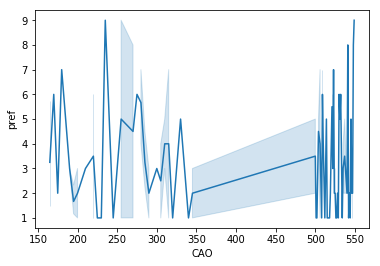

In [18]:
sns.lineplot (x = 'CAO', y = "pref", data = df)

### Section Six - references and conclusion

[HEA](http://hea.ie/)

https://en.wikipedia.org/wiki/Benford%27s_law

https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html ##describe 

[1] [programming & Scripting project 2018](https://github.com/Hudsonsue/GMIT-project-2018-programming-scripting)
[2][stackoverflow save to file](https://stackoverflow.com/questions/45200375/stdout-redirect-from-jupyter-notebook-is-landing-in-the-terminal)
[3][stackoverflow random dates](https://stackoverflow.com/questions/41006182/generate-random-dates-within-a-range-in-numpy)

### END